In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
churn_data=pd.read_csv("churn_data.csv")
churn_data 

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
customer_data=pd.read_csv("customer_data.csv")
customer_data 

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [4]:
internet_data=pd.read_csv("internet_data.csv")
internet_data 

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [5]:
# Merging the data on customer_id
df_1=pd.merge(churn_data,customer_data,how='inner',on='customerID')
#combing with the last one
telecom=pd.merge(df_1,internet_data,how='inner',on='customerID')
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Male,...,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Female,...,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,Female,...,Yes,Yes,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Male,...,Yes,No,Yes,Fiber optic,No,No,No,No,No,No


In [6]:
telecom.shape

(7043, 21)

In [7]:
telecom.describe

<bound method NDFrame.describe of       customerID  tenure PhoneService        Contract PaperlessBilling  \
0     7590-VHVEG       1           No  Month-to-month              Yes   
1     5575-GNVDE      34          Yes        One year               No   
2     3668-QPYBK       2          Yes  Month-to-month              Yes   
3     7795-CFOCW      45           No        One year               No   
4     9237-HQITU       2          Yes  Month-to-month              Yes   
...          ...     ...          ...             ...              ...   
7038  6840-RESVB      24          Yes        One year              Yes   
7039  2234-XADUH      72          Yes        One year              Yes   
7040  4801-JZAZL      11           No  Month-to-month              Yes   
7041  8361-LTMKD       4          Yes  Month-to-month              Yes   
7042  3186-AJIEK      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  gender  \

In [8]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [9]:
telecom.info

<bound method DataFrame.info of       customerID  tenure PhoneService        Contract PaperlessBilling  \
0     7590-VHVEG       1           No  Month-to-month              Yes   
1     5575-GNVDE      34          Yes        One year               No   
2     3668-QPYBK       2          Yes  Month-to-month              Yes   
3     7795-CFOCW      45           No        One year               No   
4     9237-HQITU       2          Yes  Month-to-month              Yes   
...          ...     ...          ...             ...              ...   
7038  6840-RESVB      24          Yes        One year              Yes   
7039  2234-XADUH      72          Yes        One year              Yes   
7040  4801-JZAZL      11           No  Month-to-month              Yes   
7041  8361-LTMKD       4          Yes  Month-to-month              Yes   
7042  3186-AJIEK      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  gender  \
0

In [10]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


# Now lets start preparing the data 

In [11]:
varlist=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def Binary_map(x):
    return x.map({'Yes':1,'No':0})
telecom[varlist]=telecom[varlist].apply(Binary_map)

In [12]:
telecom[varlist]

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0
...,...,...,...,...,...
7038,1,1,0,1,1
7039,1,1,0,1,1
7040,0,1,0,1,1
7041,1,1,1,1,0


### For Categorical variables lets create Dummy variables

In [13]:
dummy1= pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
telecom=pd.concat([telecom,dummy1],axis=1)

In [14]:
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.5,0,Male,...,Yes,Yes,1,0,0,0,1,1,0,0
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.9,0,Female,...,Yes,Yes,1,0,1,0,0,0,1,0
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,...,No,No,0,0,0,1,0,0,0,0
7041,8361-LTMKD,4,1,Month-to-month,1,Mailed check,74.40,306.6,1,Male,...,No,No,0,0,0,0,1,1,1,0


In [15]:
# for rest remaining categorical variables
ml=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
ml1=ml.drop(['MultipleLines_No phone service'],1)
telecom=pd.concat([telecom,ml1],axis=1)

os=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1=os.drop(['OnlineSecurity_No internet service'],1)
telecom=pd.concat([telecom,os1],axis=1)



ob=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1=ob.drop(['OnlineBackup_No internet service'],1)
telecom=pd.concat([telecom,ob1],axis=1)

dp=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1=dp.drop(['DeviceProtection_No internet service'],1)
telecom=pd.concat([telecom,dp1],axis=1)



ts=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1=ts.drop(['TechSupport_No internet service'],1)
telecom=pd.concat([telecom,ts1],axis=1)



sm=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1=sm.drop(['StreamingMovies_No internet service'],1)
telecom=pd.concat([telecom,sm1],axis=1)


st=pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1=st.drop(['StreamingTV_No internet service'],1)
telecom=pd.concat([telecom,st1],axis=1)

telecom

/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/2759951180.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ml1=ml.drop(['MultipleLines_No phone service'],1)
/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/2759951180.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  os1=os.drop(['OnlineSecurity_No internet service'],1)
/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/2759951180.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  ob1=ob.drop(['OnlineBackup_No internet service'],1)
/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/2759951180.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' wi

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,One year,1,Mailed check,84.80,1990.5,0,Male,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,One year,1,Credit card (automatic),103.20,7362.9,0,Female,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,Month-to-month,1,Electronic check,29.60,346.45,0,Female,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,Month-to-month,1,Mailed check,74.40,306.6,1,Male,...,1,0,1,0,1,0,1,0,1,0


In [16]:
# converting data type of charges from obejct to float
telecom['TotalCharges']=pd.to_numeric(telecom["TotalCharges"],errors='coerce')


In [17]:
telecom.dtypes

customerID                                object
tenure                                     int64
PhoneService                               int64
Contract                                  object
PaperlessBilling                           int64
PaymentMethod                             object
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender                                    object
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
MultipleLines                             object
InternetService                           object
OnlineSecurity                            object
OnlineBackup                              object
DeviceProtection                          object
TechSupport                               object
StreamingTV                               object
StreamingMovies     

In [18]:
# droping the un required variables
telecom=telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','TechSupport',
                      'StreamingTV','StreamingMovies'],1)

/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/2494978749.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  telecom=telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService','TechSupport',


In [19]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 35 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  OnlineSecurity                         7043 non-null   object 
 11  Onli

In [20]:
# Lets check for outliers in continous variables
n_telecom=telecom[['tenure','MonthlyCharges','SeniorCitizen','TotalCharges']]
n_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,SeniorCitizen,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,0.162147,2283.300441
std,24.559481,30.090047,0.368612,2266.771362
min,0.000000,18.250000,0.000000,18.800000
25%,9.000000,35.500000,0.000000,401.450000
50%,29.000000,70.350000,0.000000,1397.475000
75%,55.000000,89.850000,0.000000,3794.737500
90%,69.000000,102.600000,1.000000,5976.640000
95%,72.000000,107.400000,1.000000,6923.590000
99%,72.000000,114.729000,1.000000,8039.883000


From obove it can be observed that there are not any major outliers here that should be removed

In [21]:
# checking for null values and then imputing them
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes               

In [22]:
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.50,0,0,1,1,...,1,0,0,1,0,1,0,1,0,1
7039,2234-XADUH,72,1,1,103.20,7362.90,0,0,1,1,...,0,1,0,1,1,0,0,1,0,1
7040,4801-JZAZL,11,0,1,29.60,346.45,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
7041,8361-LTMKD,4,1,1,74.40,306.60,1,1,1,0,...,1,0,1,0,1,0,1,0,1,0


11/7043=0.1% which are not significant so lets remove these values from totalcharges

In [23]:
telecom=telecom[~np.isnan(telecom['TotalCharges'])]

In [24]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecur

In [25]:
# Lets split data in test and train
x=telecom.drop(['Churn','customerID'],axis=1)
x 

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes,StreamingTV_No,StreamingTV_Yes
0,1,0,1,29.85,29.85,0,1,0,No,Yes,...,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,Yes,No,...,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,Yes,Yes,...,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,Yes,No,...,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,No,No,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,0,1,1,Yes,No,...,1,0,0,1,0,1,0,1,0,1
7039,72,1,1,103.20,7362.90,0,1,1,No,Yes,...,0,1,0,1,1,0,0,1,0,1
7040,11,0,1,29.60,346.45,0,1,1,Yes,No,...,1,0,1,0,1,0,1,0,1,0
7041,4,1,1,74.40,306.60,1,1,0,No,No,...,1,0,1,0,1,0,1,0,1,0


In [26]:
y=telecom['Churn']
y 

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7,test_size=.3,random_state=100)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
x_train[['tenure','MonthlyCharges','TotalCharges']]=StandardScaler().fit_transform(x_train[['tenure','MonthlyCharges','TotalCharges']])



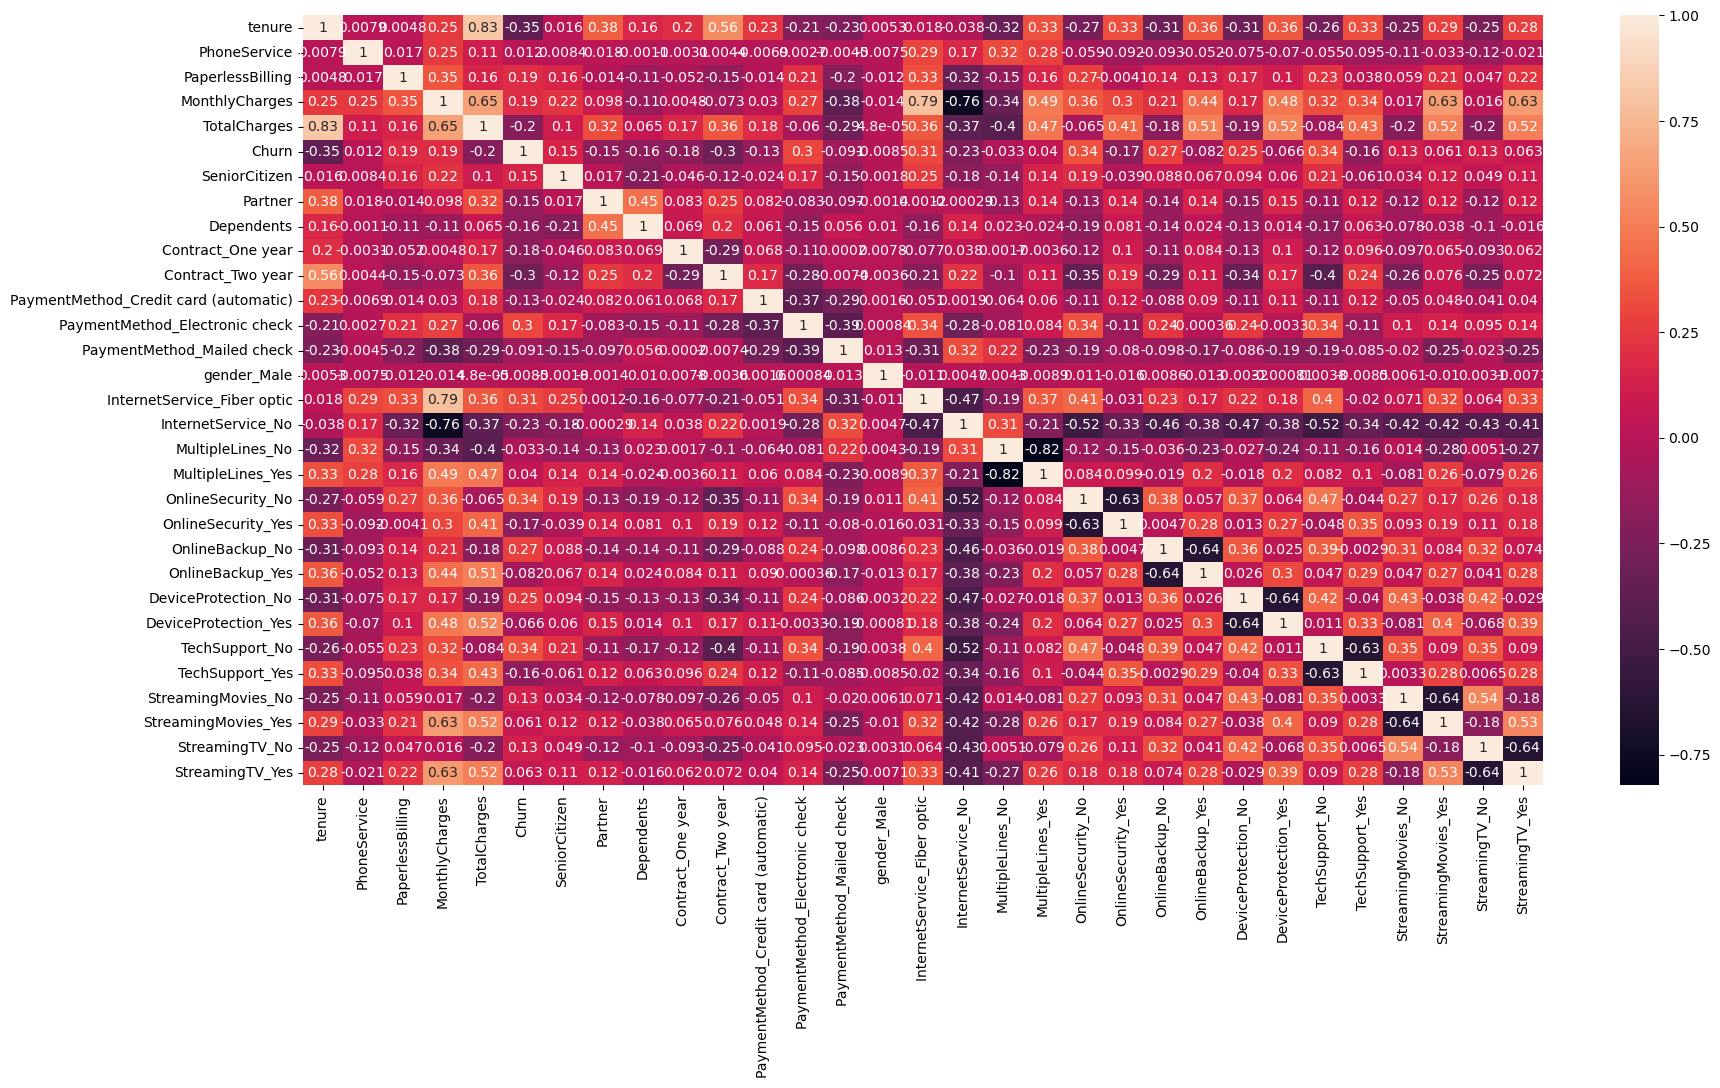

In [30]:
# Lets have a look on co-relations using heatmap
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

Here we can see alot of co-relations so it may be smart to have drop some dummies which are highly co-related

In [31]:
x_test=x_test.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 
                    'TechSupport_No', 'StreamingMovies_No', 'StreamingTV_No'],1)

x_train=x_train.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 
                    'TechSupport_No', 'StreamingMovies_No', 'StreamingTV_No'],1)

/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/3701383394.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_test=x_test.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No',
/var/folders/2n/yg33rlwd291f09gzxqv4t9kh0000gn/T/ipykernel_62913/3701383394.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_train=x_train.drop(['MultipleLines_No', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No',


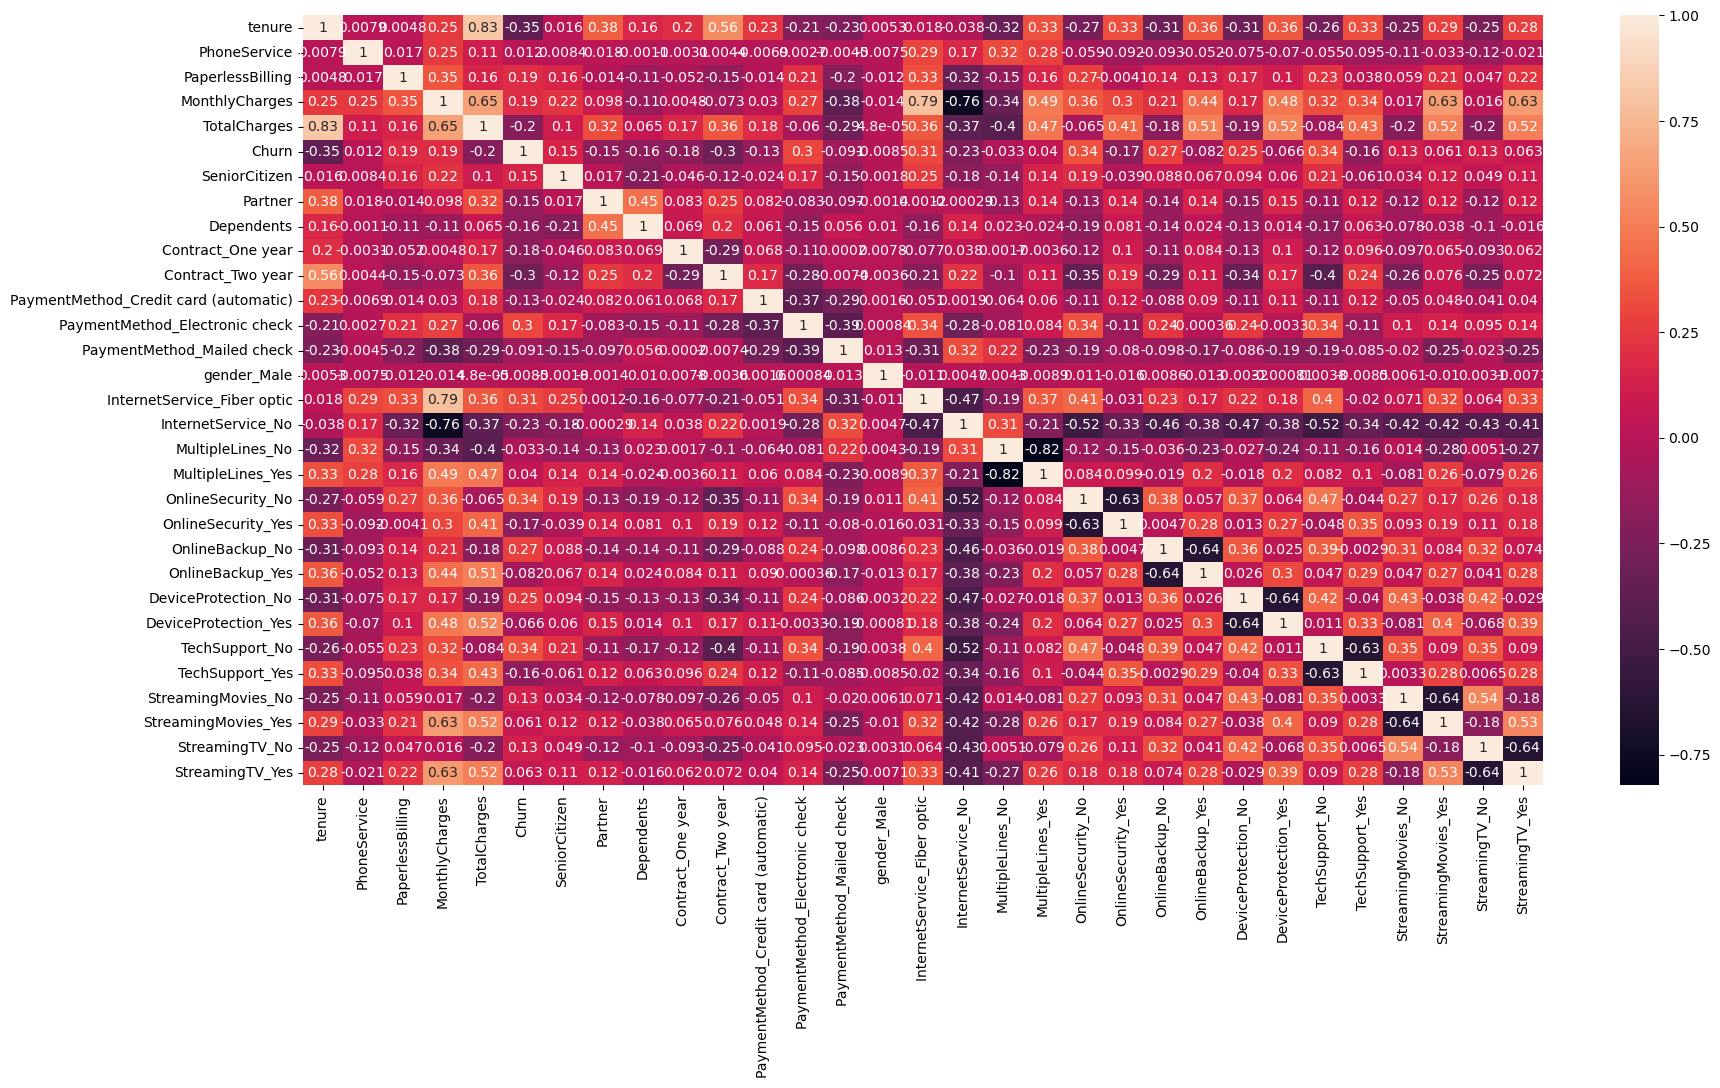

In [32]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

In [33]:
# Lets start running our training model
import statsmodels.api as sm 
x_train = pd.get_dummies(x_train, drop_first=True)

In [34]:
logm1=sm.GLM(y_train,(sm.add_constant(x_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 09 Apr 2023   Deviance:                       4009.4
Time:                        14:23:42   Pearson chi2:                 6.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2844
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.6948      0.245     -2.831      0.005      -1.176      -0.214
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0123      0.108     -0.113      0.910      -0.224       0.200
OnlineBackup_Yes                          0.0870      0.106      0.822      0.411      -0.120       0.294
DeviceProtection_Yes                      0.1614      0.108      1.501      0.133      -0.049       0.372
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
OnlineSecurity_No internet service       -0.6948      0.245     -2.831      0.005      -1.176      -0.214
OnlineSecurity_Yes                       -0.0123      0.108     -0.113      0.910      -0.224       0.200
OnlineBac

In [35]:
np.asarray(x_train)

array([[ 0.01969334,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.30538352,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-1.28631894,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.67269947,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.44814426,  1.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.01969334,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ]])

### FEATURE SELECTION USING RFE

In [36]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()

In [37]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,step=15)
rfe=rfe.fit(x_train,y_train)

In [38]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False,  True, False,  True,  True, False,  True, False,
        True, False])

In [39]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('tenure', True, 1),
 ('PhoneService', False, 2),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 2),
 ('Dependents', False, 2),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', False, 2),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 2),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', False, 2),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_Yes', True, 1),
 ('StreamingMovies_Yes', False, 2),
 ('StreamingTV_Yes', True, 1),
 ('OnlineSecurity_No internet service', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_No internet service', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_No internet service', True, 1),
 ('Device

In [40]:
col = x_train.columns[rfe.support_]

In [41]:
x_train.columns[~rfe.support_]

Index(['PhoneService', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'DeviceProtection_Yes', 'StreamingMovies_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes'],
      dtype='object')

### Assessing the model with StatsModels

In [42]:
x_train_sm=sm.add_constant(x_train[col])
logm2= sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.7
Date:                Sun, 09 Apr 2023   Deviance:                       4069.3
Time:                        14:23:42   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2756
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.8661      0.145    -12.829      0.000      -2.151      -1.581
tenure                                  -1.4726      0.185     -7.964      0.000      -1.835      -1.110
PaperlessBilling                         0.3927      0.089      4.425      0.000       0.219       0.567
MonthlyCharges                          -0.3496      0.159     -2.195      0.028      -0.662      -0.037
TotalCharges                             0.6989      0.196      3.568      0.000       0.315       1.083
SeniorCitizen                            0.4907      0.098      4.985      0.000       0.298       0.684
Contract_One year                       -0.7438      0.127     -5.871      0.000      -0.992      -0.495
Contract_Two year                       -1.3765      0.210     -6.558      0.000      -1.788      -0.965
InternetService_Fiber optic              1.1271      0.188      5.997      0.000       0.759       1.496
InternetService_No                      -0.3385      0.050     -6.769      0.000      -0.437      -0.241
TechSupport_Yes                         -0.3832      0.106     -3.620      0.000      -0.591      -0.176
StreamingTV_Yes                          0.5008      0.110      4.541      0.000       0.285       0.717
OnlineSecurity_No internet service      -0.3385      0.050     -6.769      0.000      -0.437      -0.241
OnlineBackup_No internet service        -0.3385      0.050     -6.769      0.000      -0.437      -0.241
DeviceProtection_No internet service    -0.3385      0.050     -6.769      0.000      -0.437      -0.241
========================================================================================================
"""

In [43]:
# Getting the predicted values on the train set
y_train_pred=res.predict(x_train_sm)
y_train_pred[:10]

879     0.171164
5790    0.207722
6498    0.660074
880     0.553109
2784    0.625734
3874    0.402171
5387    0.308670
6623    0.772157
4465    0.155722
5364    0.502788
dtype: float64

In [44]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.1711642 , 0.20772163, 0.66007435, 0.55310885, 0.62573435,
       0.40217138, 0.30866962, 0.77215697, 0.15572165, 0.50278755])

In [45]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final

,Churn,Churn_Prob,CustID
0,0,0.171164,879
1,0,0.207722,5790
2,1,0.660074,6498
3,1,0.553109,880
4,1,0.625734,2784
...,...,...,...
4917,0,0.014768,79
4918,0,0.126336,3934
4919,0,0.048399,5964
4920,0,0.146434,6947


In [46]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.171164,879,0
1,0,0.207722,5790,0
2,1,0.660074,6498,1
3,1,0.553109,880,1
4,1,0.625734,2784,1


In [47]:
from sklearn import metrics

In [48]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

[[3281  354]
 [ 606  681]]


In [49]:
#predicted.  not_churn.   churn
#not_churn.    3281.        354
#churn.         606.        681

In [50]:
# Lets check the overall accuracy of the model
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)*100)

80.49573344169036


# Checking VIFs

In [51]:
# high value of vipf is problematic and low value is fine

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif 

/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/Users/ashutoshkaushal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,InternetService_No,inf
11,OnlineSecurity_No internet service,inf
12,OnlineBackup_No internet service,inf
13,DeviceProtection_No internet service,inf
2,MonthlyCharges,12.60
3,TotalCharges,10.19
0,tenure,6.87
7,InternetService_Fiber optic,5.36
6,Contract_Two year,2.89
10,StreamingTV_Yes,2.61


In [55]:
col=col.drop('InternetService_No',1)#,'OnlineSecurity_No internet service','OnlineBackup_No internet service',
             #'DeviceProtection_No internet service	','MonthlyCharges'
            #)

In [56]:
col=col.drop('OnlineSecurity_No internet service',1)#,
col=col.drop('OnlineBackup_No internet service',1)
col=col.drop('DeviceProtection_No internet service',1)
col=col.drop('MonthlyCharges',1)

In [57]:
 # nnow lets re-run the model
x_train_sm=sm.add_constant(x_train[col])
logm3= sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4912
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2064.0
Date:                Sun, 09 Apr 2023   Deviance:                       4128.1
Time:                        14:31:48   Pearson chi2:                 5.97e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2669
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0440      0.107    -19.084      0.000      -2.254      -1.834
tenure                         -1.3731      0.169     -8.101      0.000      -1.705      -1.041
PaperlessBilling                0.4684      0.087      5.356      0.000       0.297       0.640
TotalCharges                    0.5664      0.171      3.312      0.001       0.231       0.902
SeniorCitizen                   0.5324      0.098      5.405      0.000       0.339       0.725
Contract_One year              -0.8504      0.125     -6.820      0.000      -1.095      -0.606
Contract_Two year              -1.5625      0.206     -7.602      0.000      -1.965      -1.160
InternetService_Fiber optic     1.0106      0.102      9.901      0.000       0.811       1.211
TechSupport_Yes                -0.3077      0.101     -3.056      0.002      -0.505      -0.110
StreamingTV_Yes                 0.4639      0.093      4.979      0.000       0.281       0.646
===============================================================================================
"""

In [60]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.14688655, 0.16869885, 0.65683817, 0.63205545, 0.67165356,
       0.32543818, 0.2147397 , 0.7649704 , 0.1121319 , 0.51873419])

In [62]:
y_train_pred_final['Churn_Prob'] = y_train_pred 

In [63]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.146887,879,0
1,0,0.168699,5790,0
2,1,0.656838,6498,1
3,1,0.632055,880,1
4,1,0.671654,2784,1


In [64]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)*100)

80.43478260869566


 it has not dropped much

In [ ]:
# lets check VIF again

In [65]:
vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif 

,Features,VIF
0,tenure,6.25
2,TotalCharges,5.80
6,InternetService_Fiber optic,2.63
1,PaperlessBilling,2.41
8,StreamingTV_Yes,2.30
5,Contract_Two year,2.20
7,TechSupport_Yes,1.78
4,Contract_One year,1.44
3,SeniorCitizen,1.30


In [66]:
col=col.drop('tenure',1)

In [67]:
 # nnow lets re-run the model
x_train_sm=sm.add_constant(x_train[col])
logm4= sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4913
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2104.0
Date:                Sun, 09 Apr 2023   Deviance:                       4208.1
Time:                        14:46:28   Pearson chi2:                 5.14e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.2549
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.9938      0.105    -19.044      0.000      -2.199      -1.789
PaperlessBilling                0.4383      0.087      5.065      0.000       0.269       0.608
TotalCharges                   -0.7388      0.062    -11.872      0.000      -0.861      -0.617
SeniorCitizen                   0.5021      0.098      5.117      0.000       0.310       0.694
Contract_One year              -1.0435      0.120     -8.689      0.000      -1.279      -0.808
Contract_Two year              -1.9636      0.194    -10.121      0.000      -2.344      -1.583
InternetService_Fiber optic     1.3738      0.093     14.770      0.000       1.191       1.556
TechSupport_Yes                -0.1817      0.099     -1.826      0.068      -0.377       0.013
StreamingTV_Yes                 0.6375      0.090      7.092      0.000       0.461       0.814
===============================================================================================
"""

In [68]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [69]:
y_train_pred[:10]

array([0.20567307, 0.3026612 , 0.63139246, 0.66395868, 0.70925171,
       0.28071606, 0.18734653, 0.73927594, 0.15303854, 0.51116937])

In [70]:
y_train_pred_final['Churn_Prob'] = y_train_pred 

In [71]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.205673,879,0
1,0,0.302661,5790,0
2,1,0.631392,6498,1
3,1,0.663959,880,1
4,1,0.709252,2784,1


In [72]:
print(metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)*100)
# Accuraccy is basically same

80.00812677773263


In [73]:
vif=pd.DataFrame()
vif['Features']=x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif 

,Features,VIF
0,PaperlessBilling,2.40
5,InternetService_Fiber optic,2.27
7,StreamingTV_Yes,2.20
6,TechSupport_Yes,1.71
4,Contract_Two year,1.41
1,TotalCharges,1.40
2,SeniorCitizen,1.29
3,Contract_One year,1.25


In [74]:
(1000+1200)/(1000+1200+300)

0.88